> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# import

In [189]:
library(lubridate)
library(ggplot2)
library(car)
#library(forecast)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# 1

다음은 어느 서점에서 최근 10 일동안 판매된 경제 서적의 일별 판매액 (단위 : 만원)을 나타내는
시계열 자료이다. 이 자료에 상수평균모형을 적합시키려 한다.

|k|1|2|3|4|5|6|7|8|9|10|
|-- |-- |-- |-- |-- |-- |-- |-- |-- |-- |--   |
|$Z_t$|52|46|46|52|50|50|48|45|41|53|

## (1)

상수평균모형을 적합하여라.

상수평균모형 $Z_t = \beta_0 + \epsilon_t$

LSE: $\hat {\beta_0} = \bar{Z}=48.3$

In [138]:
z=c(52,46,46,52,50,50,48,45,41,53)

In [88]:
mean(z)

[1] 48.3

$\hat{Z_t} = \hat{\beta_0} = 48.3$

## (2)

미래값 $Z_{10+l}$ 에 대한 예측값 $\hat{Z}_{10}(l)$을 구하시오. $(l = 1, 2, 3, 4, 5)$

> **note** 시점 n에서의 l-시차 후의 예측값: $\hat{Z_n(l)} = \hat{\beta_0} = \bar{Z}$

$\hat{Z}_{10}(1)=\hat{Z}_{10}(2)=\hat{Z}_{10}(3)=\hat{Z}_{10}(4)=\hat{Z}_{10}(5)=48.3$

## (3)

미래값 $Z_{10+l}, l = 1, 2, 3, 4, 5$에 대한 95% 예측구간을 구하고, 예측값 및 예측구간의 하한값과
상한값을 관측값 $Z_t$의 시계열과 함께 표시하여라.


> **note** $Z_{n+l}$의 $100(1-\alpha)$% 예측 구간: $\bar{Z} \pm t_{\alpha/2}(n-1) \times \sqrt{(1+\frac{1}{n})s^2}$

In [89]:
qt(0.975,9)

[1] 2.262157

In [90]:
mean_z <- mean(z)
n <- length(z)
df <- n - 1
sample_variance <- sum((z - mean_z)^2) / df

In [91]:
sample_variance

[1] 14.45556

In [92]:
t_critical

[1] 2.262157

In [93]:
sqrt( 1.1 * 14.46 )

[1] 3.988233

In [154]:
lwr <- 48.3-2.26*3.98823269130576
upr <- 48.3+2.26*3.98823269130576


In [166]:
lwr <- 39.286594117649
upr <- 57.313405882351

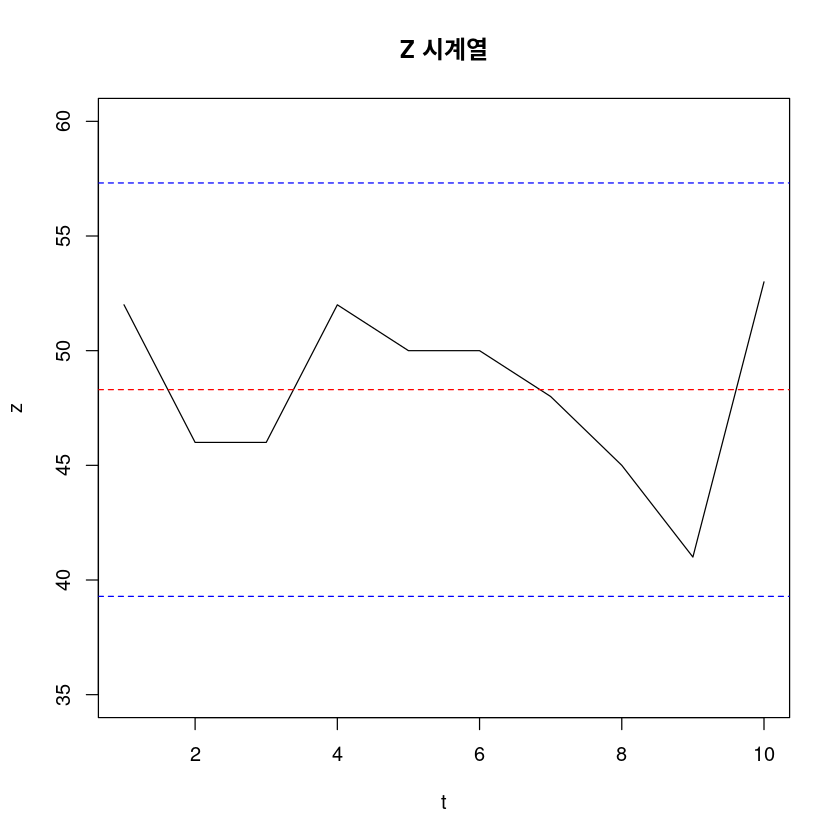

In [168]:
t <- c(1:10)
plot(t,z, type='l',  xlab = "t", ylab = "z", main = "Z 시계열", ylim=c(35,60))
abline(h=mean_z, col="red", lty=2)
abline(h = lwr, col = "blue", lty = 2)
abline(h = upr, col = "blue", lty = 2)

# 2

 다음은 신장개업한 어느 편의점의 15 주간 주별 매출액을 나타낸 시계열자료이다. 이 자료에
선형추세모형을 적합시키려 한다.


|k|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|
|--|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|$Z_t$|303|298|303|314|303|314|310|324|317|327|323|324|331|330|332|

## (1)

선형추세모형을 쓰시오.

In [99]:
z <- c(303,298,303,314,303,314,310,324,317,327,323,324,331,330,332)

In [100]:
t <- 1:15
df <- data.frame(t, z)
reg <- lm(z~t, data=df)
summary(reg)


Call:
lm(formula = z ~ t, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.710 -2.331 -1.181  2.519  7.133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  297.781      2.364 125.964  < 2e-16 ***
t              2.386      0.260   9.176 4.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.351 on 13 degrees of freedom
Multiple R-squared:  0.8662,	Adjusted R-squared:  0.856 
F-statistic: 84.19 on 1 and 13 DF,  p-value: 4.836e-07


> **note** $Z_t=\beta_0+\beta_1 t + \epsilon_t, \epsilon_t \sim N(0,\sigma^2), i.i.d$

## (2)

최소제곱법에 의하여 구한 $β_0, β_1$의 추정량이 각각 다음과 같아짐을 보여라.

$$\hat{\beta_0} = \frac{2(2n+1)}{n(n-1)} \sum_{t=1}^n Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n t_t$$

$$\hat{\beta_1} = \frac{12}{n(n^2-1)} \sum_{t=1}^n t Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n Z_t$$

$Z_t = \beta_0 + \beta_1 t + \epsilon_t$

최소제곱법을 통해 $\beta$값 추정하자.

$S = \sum_{t=1}^n \epsilon_t^2 = \sum_{t=1}^n(Z_t-\beta_0-\beta_1t)^2$

$\dfrac{\delta S}{\delta \beta_0}=\sum_{t=1}^n (Z_t-\beta_0 -\beta_1t)(-1)=0$ - (a)라고 하자

$\dfrac{\delta S}{\delta \beta_1}=\sum_{t=1}^n (Z_t-\beta_0 -\beta_1t)(-t)=0$ -(b)라고 하자.

(a)식을 $\beta_0$에 관하여 풀면

$\sum_{t=1}^n Z_t - n \hat{\beta}_0 - \hat{\beta}_1 \sum_{t=1}^n t = 0$

$\hat{\beta}_0 = \dfrac{\sum_{t=1}^n Z_t -\hat{\beta}_1 \sum_{t=1}^n t  }{n}= \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2}$ -(c)라고 하자

(b)식을 정리하면,

$\sum_{t=1}^n t Z_t = \hat{\beta}_0 \sum_{t=1}^n t + \hat{\beta}_1 \sum_{t=1}^n t^2=\hat{\beta}_0 \dfrac{n(n+1)}{2} + \hat{\beta}_1 \dfrac{n(n+1)(2n+1)}{6}$

(c)식을 (b)식에 대입 후 연립방정식을 풀자

$=\left( \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2} \right) \dfrac{n(n+1)}{2} + \hat{\beta}_1 \dfrac{n(n+1)(2n+1)}{6}$

$=\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{2n(n+1)(2n+1) -3n(n+1)^2}{12} \right)$

$=\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right)$

즉 $\sum_{t=1}^n t Z_t  =\dfrac{(n+1)}{2} \sum_{t=1}^n Z_t + \hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right)$

$\hat{\beta}_1 \left( \dfrac{n(n+1)(n-1)}{12} \right) = \sum_{t=1}^n t Z_t  - \dfrac{(n+1)}{2} \sum_{t=1}^n Z_t$

$\hat{\beta_1} = \frac{12}{n(n^2-1)} \sum_{t=1}^n t Z_t - \frac{6}{n(n-1)} \sum_{t=1}^n Z_t$

$\hat{\beta}_1$ 값 (c)식에 대입

$\hat{\beta}_0 = \dfrac{\sum_{t=1}^n Z_t}{n} - \hat{\beta}_1 \dfrac{(n+1)}{2}$

$=\dfrac{\sum_{t=1}^n Z_t}{n} - \dfrac{6}{n(n-1)} \sum_{t=1}^n tZ_t + \dfrac{3(n+1)}{n(n-1)} \sum_{t=1}^n Z_t$

$=\dfrac{2(2n+1)}{n(n-1)} \sum_{t=1}^n Z_t - \dfrac{6}{n(n-1)} \sum_{t=1}^n t_t Z_t$

## (3)

 선형추세모형을 적합하시오. (회귀계수 추정 및 모형 결과 설명)

$\hat{Z}_t=\hat{\beta_0}+\hat{\beta_1}t = 297.7714 + 2.3786 t$

위 (2)식에 대입하기

t가 1씩 증가할수록 해당 편의점의 매출액은 2.38만큼 증가한다.

## (4)

미래값 $Z_{15+l}$ 에 대한 예측값 $\hat {Z}_{15}(l)$을 구하시오. $(l = 1, 2, 3, 4, 5)$

`-` 손게산 하는 방법

$\hat{Z}_{n}(l) = \hat{\beta}_0 + \hat{\beta}_1(n+l)$

In [101]:
beta0 =297.78

In [102]:
beta1=2.38

In [103]:
beta0 + beta1 * 16

[1] 335.86

In [104]:
beta0 + beta1 * 17

[1] 338.24

In [105]:
beta0 + beta1 * 18

[1] 340.62

In [106]:
beta0 + beta1 * 19

[1] 343

In [107]:
beta0 + beta1 * 20

[1] 345.38

`-` 코드

In [108]:
new_data <- data.frame(
     t = 16:20,
     y = as.factor(1:5)
     )
new_data

t,y
<int>,<fct>
16,1
17,2
18,3
19,4
20,5


In [109]:
t <-c(1:15)
data <- data.frame(t, z)

In [110]:
m <- lm(z~t, data=data)
summary(m)


Call:
lm(formula = z ~ t, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.710 -2.331 -1.181  2.519  7.133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  297.781      2.364 125.964  < 2e-16 ***
t              2.386      0.260   9.176 4.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.351 on 13 degrees of freedom
Multiple R-squared:  0.8662,	Adjusted R-squared:  0.856 
F-statistic: 84.19 on 1 and 13 DF,  p-value: 4.836e-07


In [111]:
predict(m, newdata = new_data)

1        2        3        4        5 
335.9524 338.3381 340.7238 343.1095 345.4952

# 3

(R 실습) 다음과 같은 시계열모형으로부터 모의시계열자료 $\{Z_t, t = 1, 2, . . . , 100 \}$을 생성한 후
4개의 시계열그림을 겹쳐 그려보고 비교하여라. 그리고 각 모의시계열자료의 표본평균과 표본분
산을 구하고, 이론적인 평균 및 분산과 비료하여라.


## (1)

$Z_t = 100 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [112]:
z1 <- 100 + rnorm(100)

$E(Z_t)=E(100+\epsilon_t) = 100 + E(\epsilon_t) = 100 + 0 = 100$

$Var(Z_t) = Var(100+\epsilon_t) = Var(\epsilon_t) = 1 = 1$

## (2)

$Z_t = 500 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [113]:
z2 <- 500 + rnorm(100)

$E(Z_t)=E(500+\epsilon_t) = 500 + E(\epsilon_t) = 500 + 0 = 500$

$Var(Z_t) = Var(500+\epsilon_t) = Var(\epsilon_t) = 1 = 1$

## (3)

$Z_t = 100 + ϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 100)$ 분포를 따른다.

In [114]:
z3 <- 100 + rnorm(100, 0, 10)

$E(Z_t)=E(100+\epsilon_t) = 100 + E(\epsilon_t) = 100 + 0 = 100$

$Var(Z_t) = Var(100+\epsilon_t) = Var(\epsilon_t) = 100 = 100$

## (4)

$Z_t = 100 + tϵ_t$, 단 $ϵ_t$는 서로 독립이고 $N(0, 1)$ 분포를 따른다.

In [117]:
z4 <- 100 + t * rnorm(100)

$E(Z_t)=E(100+ t \epsilon_t) = 100 + t E(\epsilon_t) = 100 + t 0 = 100$

$Var(Z_t) = Var(100+ t \epsilon_t) = Var(t \epsilon_t) = t^2 Var(\epsilon_t) = t^2 \times 1 = t^2$

## 2 풀이

In [118]:
t <- 1:100
df <- data.frame(t,z1,z2,z3,z4)

`-` ggplot

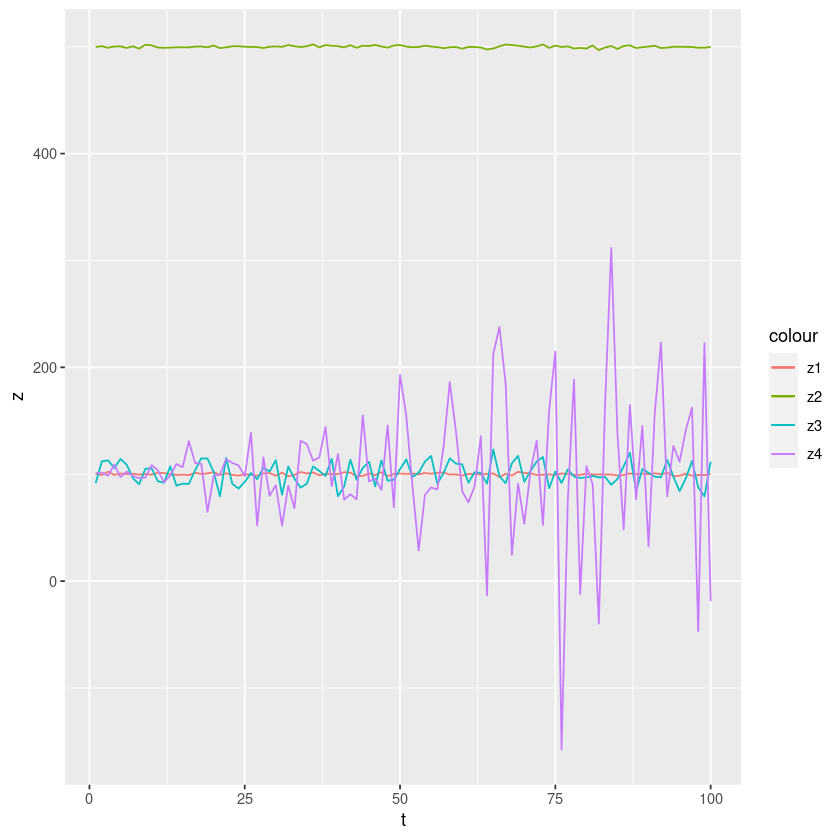

In [119]:
ggplot(data=df, aes(t)) + 
  geom_line(aes(y=z1, colour='z1')) + 
  geom_line(aes(y=z2, colour='z2')) + 
  geom_line(aes(y=z3, colour='z3')) + 
  geom_line(aes(y=z4, colour='z4')) +
  ylab('z')

`-` plot

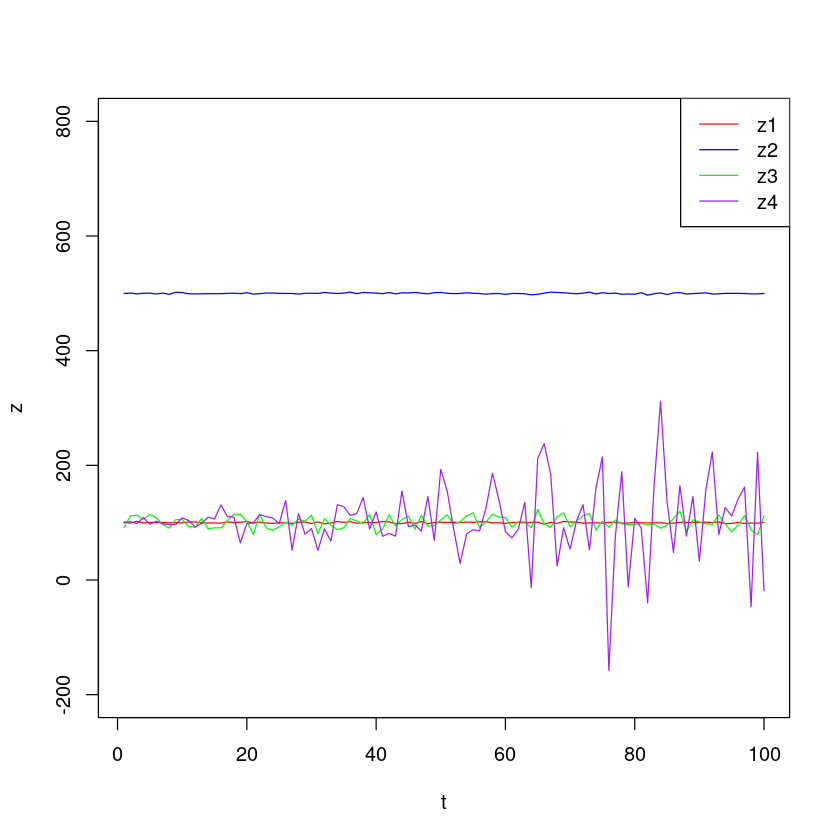

In [120]:
plot(df$t, df$z1, type = 'l', col = 'red', xlab = 't', ylab = 'z', ylim=c(-200,800))
lines(df$t, df$z2, col = 'blue')
lines(df$t, df$z3, col = 'green')
lines(df$t, df$z4, col = 'purple')
legend('topright', legend = c('z1', 'z2', 'z3', 'z4'), col = c('red', 'blue', 'green', 'purple'), lty = 1)

# 4

 (R 실습) 다음과 같은 시계열모형으로부터 모의시계열자료 $\{Z_t, t = 1, 2, . . . , 100 \}$을 생성한 후
$Z_t$와 $E(Z_t)$의 시계열그림을 겹쳐 그려라. 또한 이 시계열 자료들은 각각 어떤 성분으로 구성되어
있는지 설명하여라. 단 오차항 $ϵ_t$는 서로 독립인 $N(0, 1)$ 분포를 가정한다.

## (1)

$Z_t = 100 + ϵ_t$

상수평균모형: 불규칙성분만을 갖는 경우

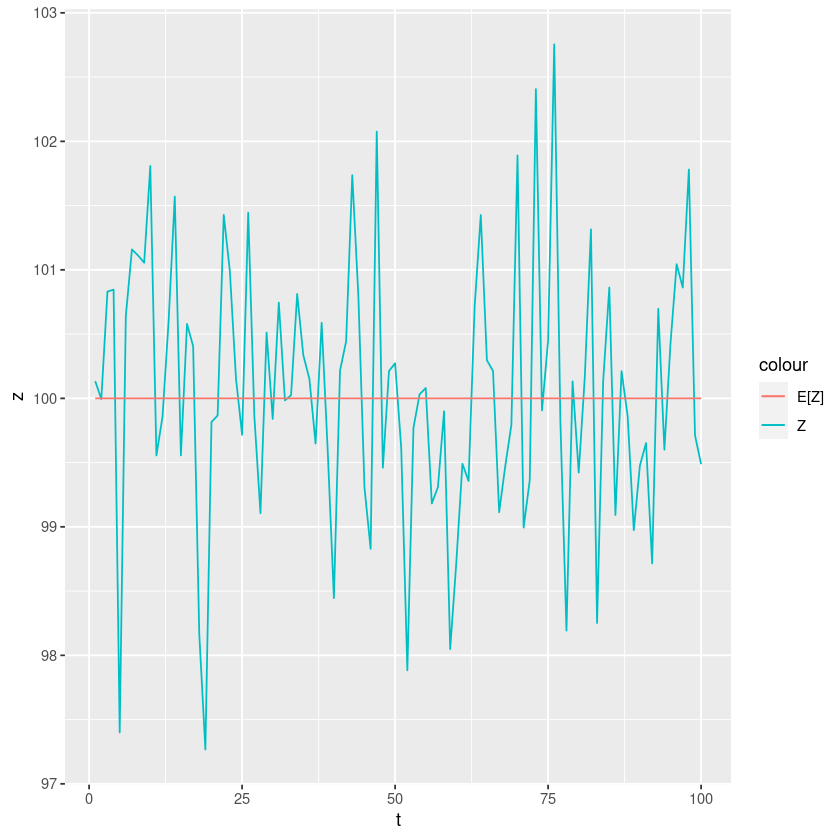

In [121]:
t <- 1:100
e <- rep(100, 100)
z <- 100 + rnorm(100)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))

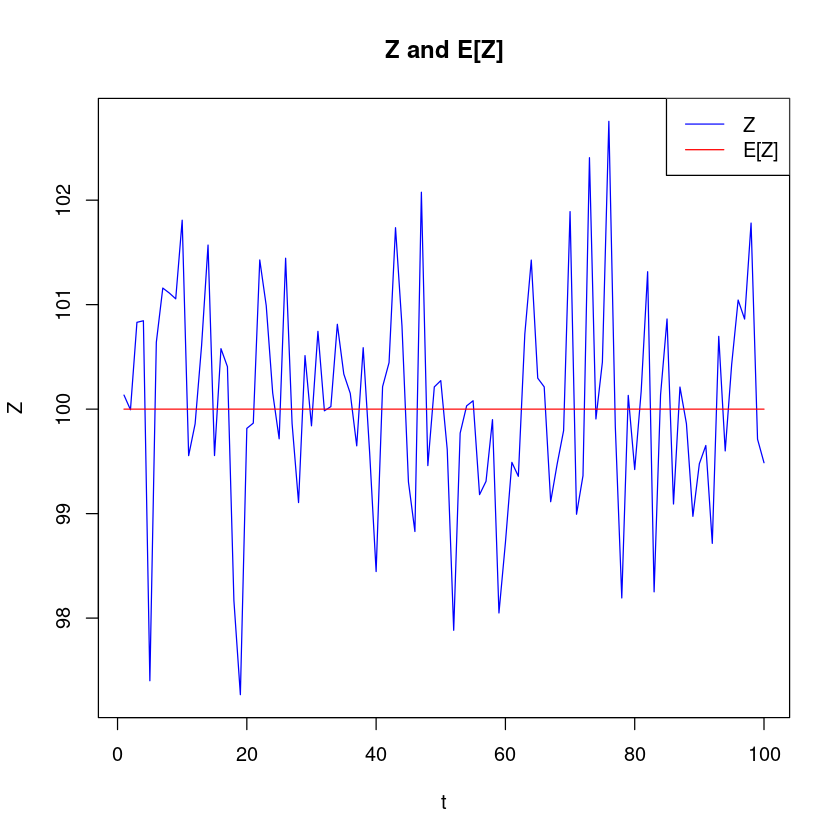

In [122]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

## (2)

$Z_t = 100 + t + ϵ_t$

선형추세모형: 직선형인 추세를 가지고 증가

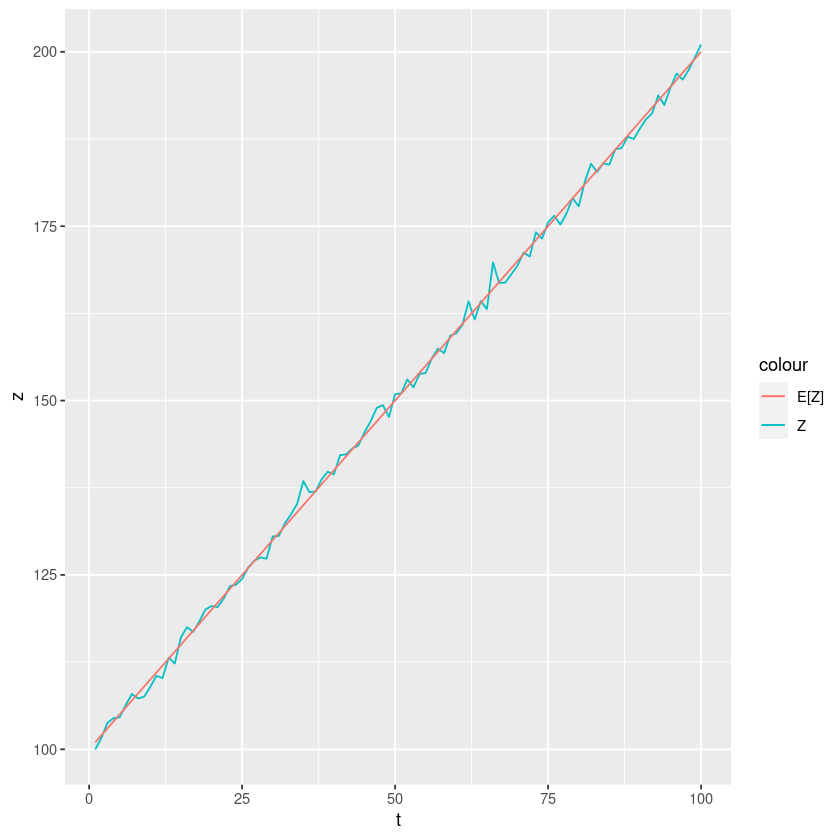

In [123]:
t <- 1:100
e <- 100 + t
z <- 100 + t + rnorm(100)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))


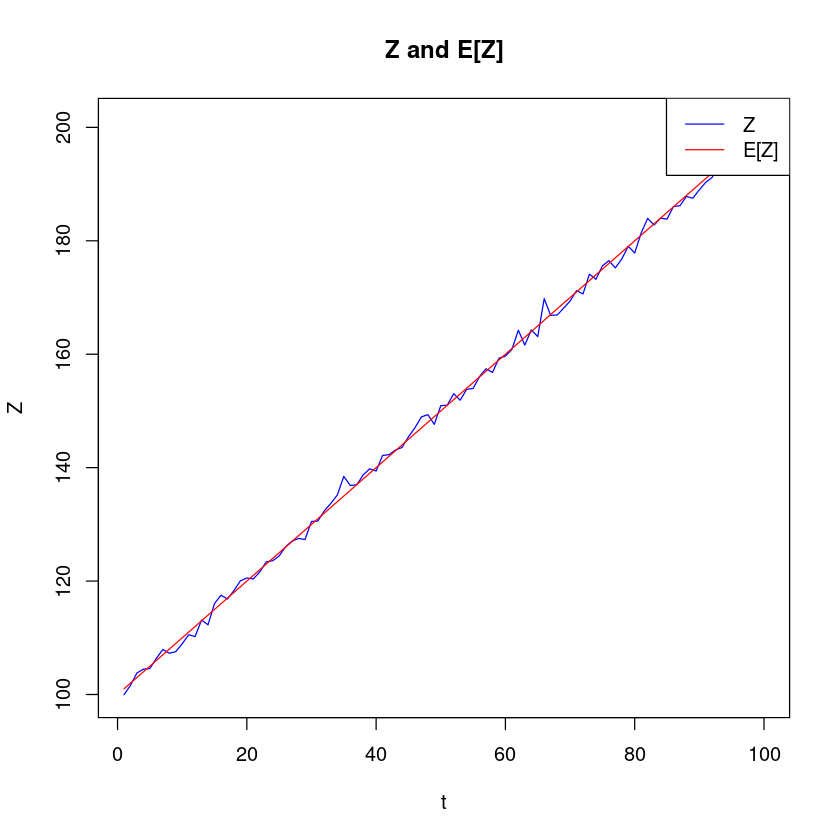

In [124]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

## (3)

$Z_t = 100 + 0.3t + sin \left( \frac{2πt}{12} \right)+ cos \left(\frac{2πt}{12} \right) + ϵ_t$


선형계절추세모형: 추세 및 계절 성분을 가진다..

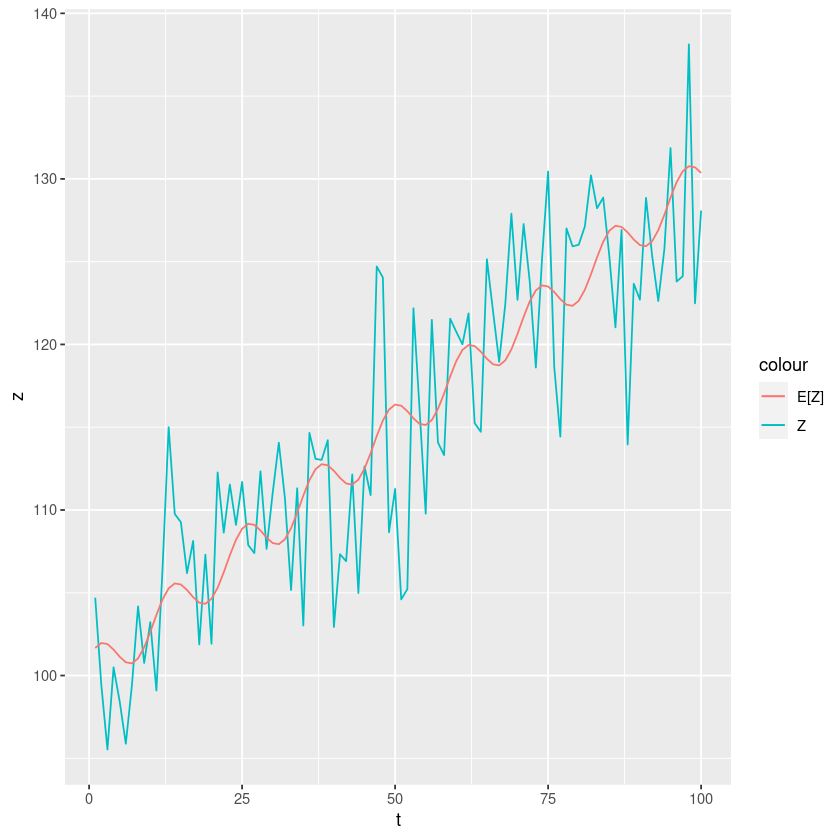

In [125]:
t <- 1:100
e <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12)
z <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12) + rnorm(100, 0, 5)
df <- data.frame(t, e, z)
ggplot(data=df, aes(t)) + geom_line(aes(y=z, colour="Z")) + geom_line(aes(y=e, colour="E[Z]"))


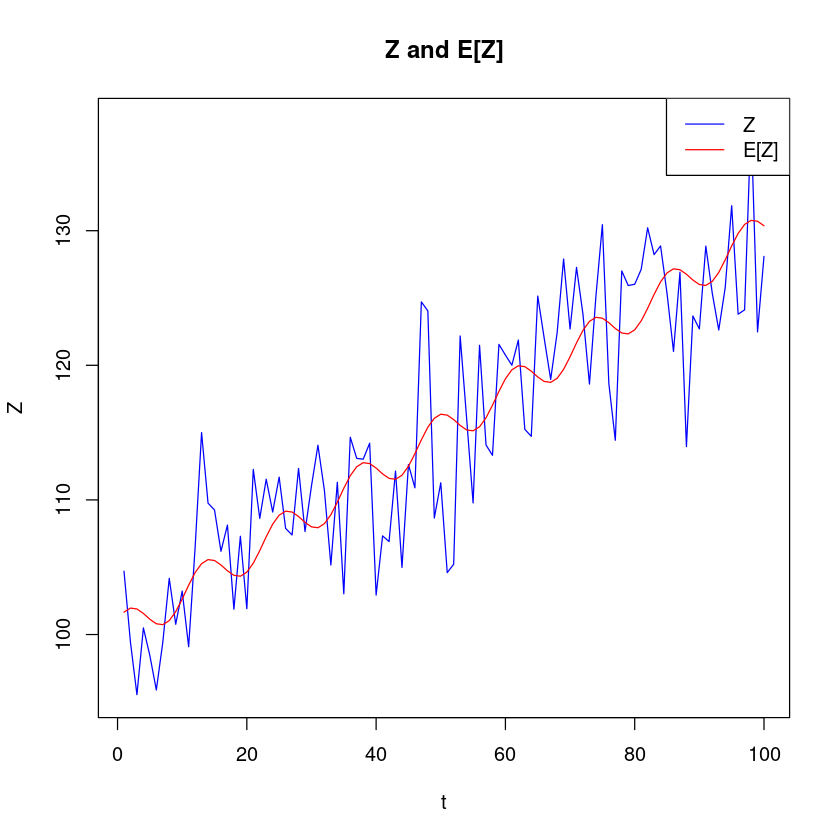

In [126]:
plot(df$t, df$z, type="l", col="blue", xlab="t", ylab="Z", main="Z and E[Z]")
lines(df$t, df$e, col="red")
legend("topright", legend=c("Z", "E[Z]"), col=c("blue", "red"), lty=1)

# 5

 (R 실습) “book.txt”는 한 서점에서 첫 30일동안 팔린 어느 베스트셀러의 일별 판매 부수(단위 :
권) 시계열자료이다.

## (1)

시계열 그림을 그리시오.

In [297]:
book <- scan("book.txt")
length(book)
head(book)

[1] 30

[1] 12 15 17 21 25 28

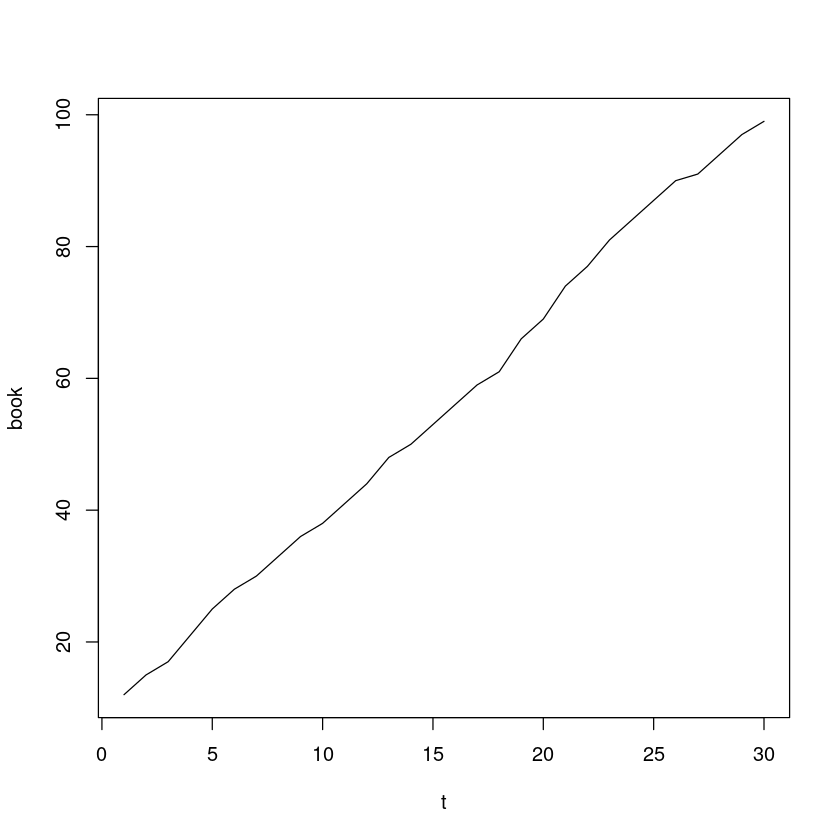

In [298]:
t <- 1:30
plot(t, book, type='l')

## (2)

 이 시계열 자료는 어떤 성분으로 구성되어 있는지 설명하시오.


선형 추세 모형

## (3)

 적절한 추세모형을 적합하여라.

In [299]:
data <- data.frame(t, book)

In [300]:
m <- lm(book~t, data=data)
summary(m)


Call:
lm(formula = book ~ t, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5563 -1.0063 -0.2081  1.0385  2.0644 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.19080    0.46960   17.44   <2e-16 ***
t            3.07586    0.02645  116.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.254 on 28 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.9979 
F-statistic: 1.352e+04 on 1 and 28 DF,  p-value: < 2.2e-16


$\hat{Z}_t = 8.19080 + 3.07586 t$

### 잔차분석

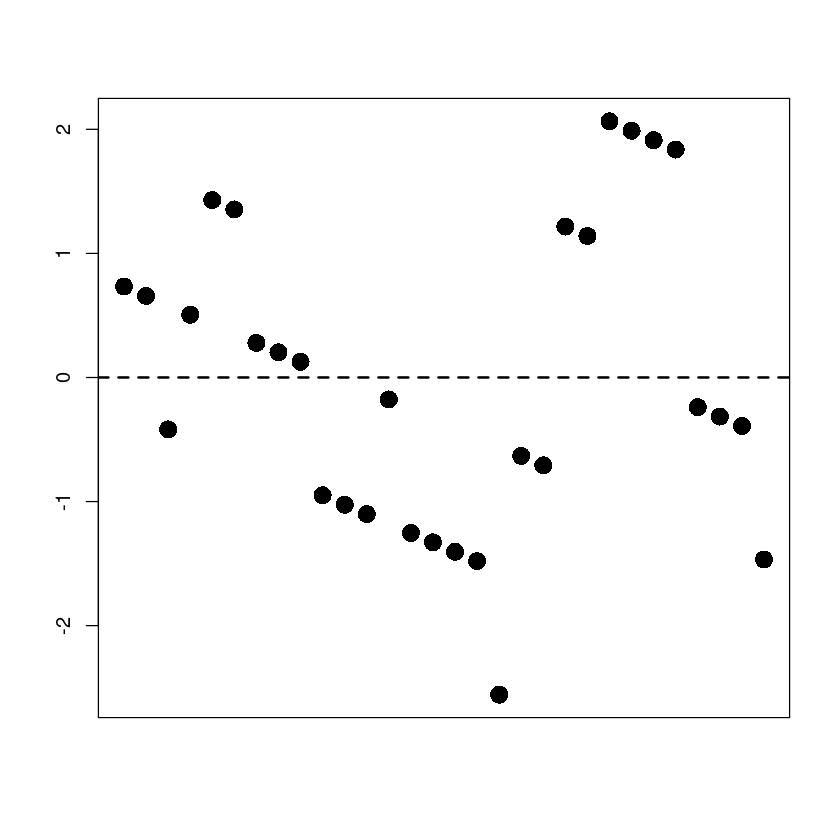

In [301]:
plot(t,resid(m),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", cex.main=2)
abline(h=0, lty=2, lwd=2)

### 독립성검정

In [302]:
dwtest(m,alternative = "two.sided")


	Durbin-Watson test

data:  m
DW = 0.50342, p-value = 1.283e-07
alternative hypothesis: true autocorrelation is not 0


### 정규분포검정

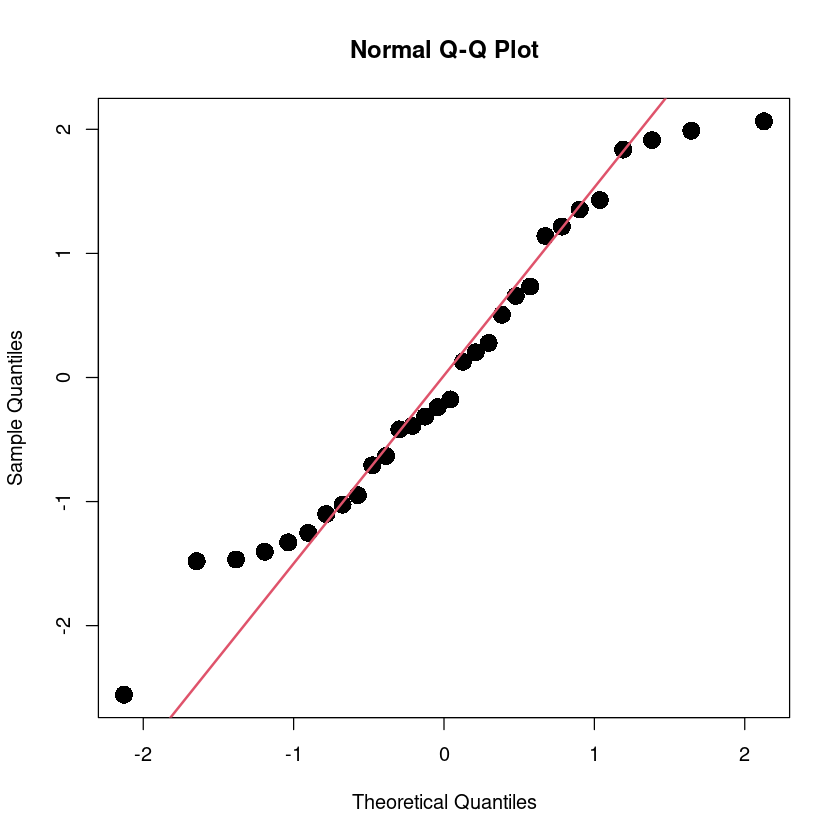

In [303]:
qqnorm(resid(m), pch=16, cex=2)
qqline(resid(m), col = 2, lwd=2)


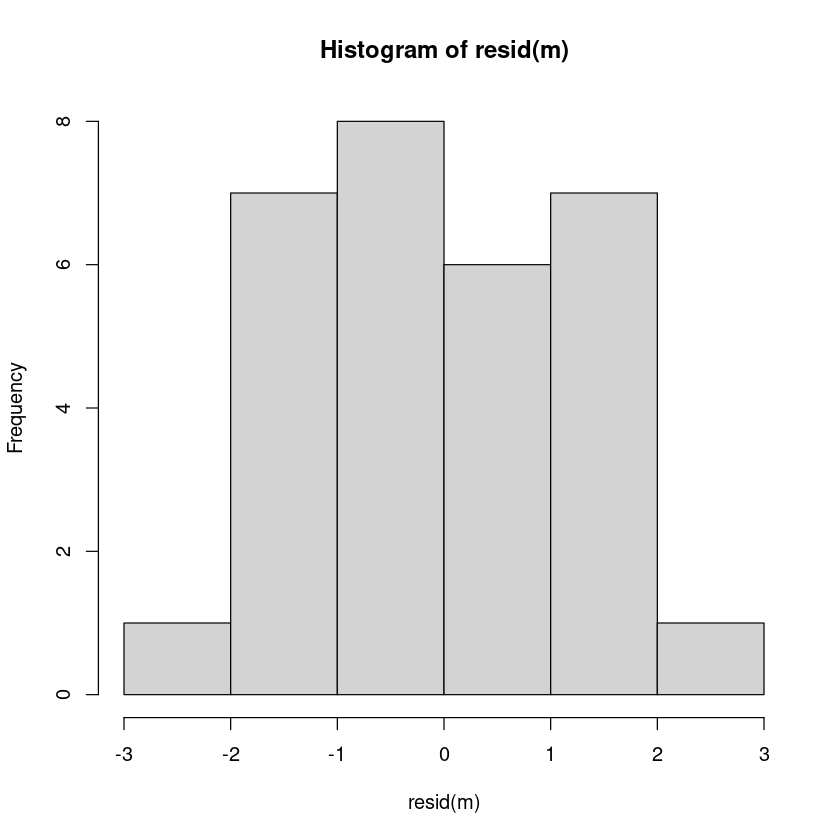

In [304]:
hist(resid(m))

In [305]:
shapiro.test(resid(m))


	Shapiro-Wilk normality test

data:  resid(m)
W = 0.96173, p-value = 0.3427


### 등분산성검정

In [306]:
bptest(m)


	studentized Breusch-Pagan test

data:  m
BP = 3.4481, df = 1, p-value = 0.06333


## (4)

마지막 관측값으로 부터 $Z_{n+l}$ 에 대한 예측값 $\hat{Z}_n (l)$을 구하시오. $(n = 30, l = 1, 2, . . . , 12)$

In [131]:
new_data <- data.frame(
     t = 31:42,
     y = as.factor(1:12)
     )
new_data

t,y
<int>,<fct>
31,1
32,2
33,3
34,4
35,5
36,6
37,7
38,8
39,9


In [132]:
predict(m, newdata = new_data)

1        2        3        4        5        6        7        8 
103.5425 106.6184 109.6943 112.7701 115.8460 118.9218 121.9977 125.0736 
       9       10       11       12 
128.1494 131.2253 134.3011 137.3770

## (5)

마지막 관측값으로 부터 $Z_{n+l}(n = 30, l = 1, 2, . . . , 12)$에 대한 95% 예측구간을 구하여라

In [133]:
predict_result <- as.data.frame(predict(m, newdata = new_data, interval = "predict",level=0.95))
predict_result

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,103.5425,100.7996,106.2855
2,106.6184,103.8584,109.3784
3,109.6943,106.9162,112.4723
4,112.7701,109.9731,115.5671
5,115.8460,113.0291,118.6629
6,118.9218,116.0842,121.7595
7,121.9977,119.1384,124.8570
8,125.0736,122.1918,127.9554
9,128.1494,125.2443,131.0546


## (6)

예측값 및 예측구간의 하한값과 상한값을 관측값 $Z_t$의 시계열과 함께 표시하여라.

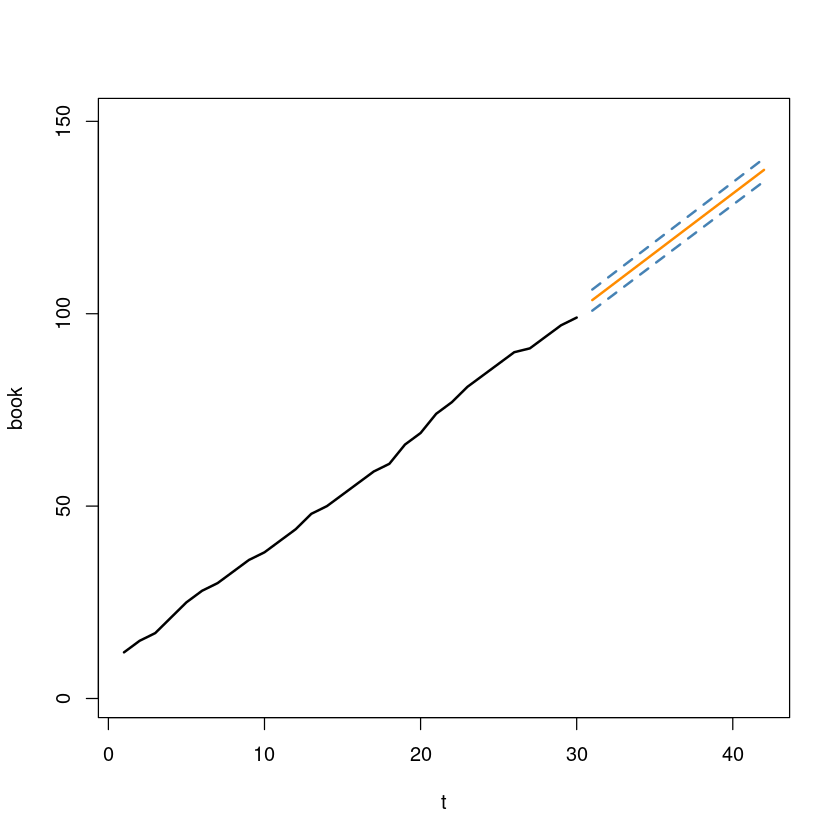

In [134]:
plot(data$book~data$t, data,
     xlab = "t", ylab = "book",
     xlim=c(1,42),
     ylim=c(1,150),
     type='l',
     lwd=2)
lines(31:42, predict_result$fit, col='darkorange', lwd=2)
lines(31:42, predict_result$lwr, col='steelblue', lwd=2, lty=2)
lines(31:42, predict_result$upr, col='steelblue', lwd=2, lty=2)

# 6 

(R 실습) “export.txt”는 월별수출액(단위:억$) 시계열자료이다.

## (1)

시계열 그림을 그리시오.

In [281]:
export <- scan("export.txt")
length(export)
head(export)

[1] 86

[1] 20.40 23.01 25.73 25.55 29.96 31.94

### ts함수 사용하여 plot (1980년 1월은 임의로 설정함)

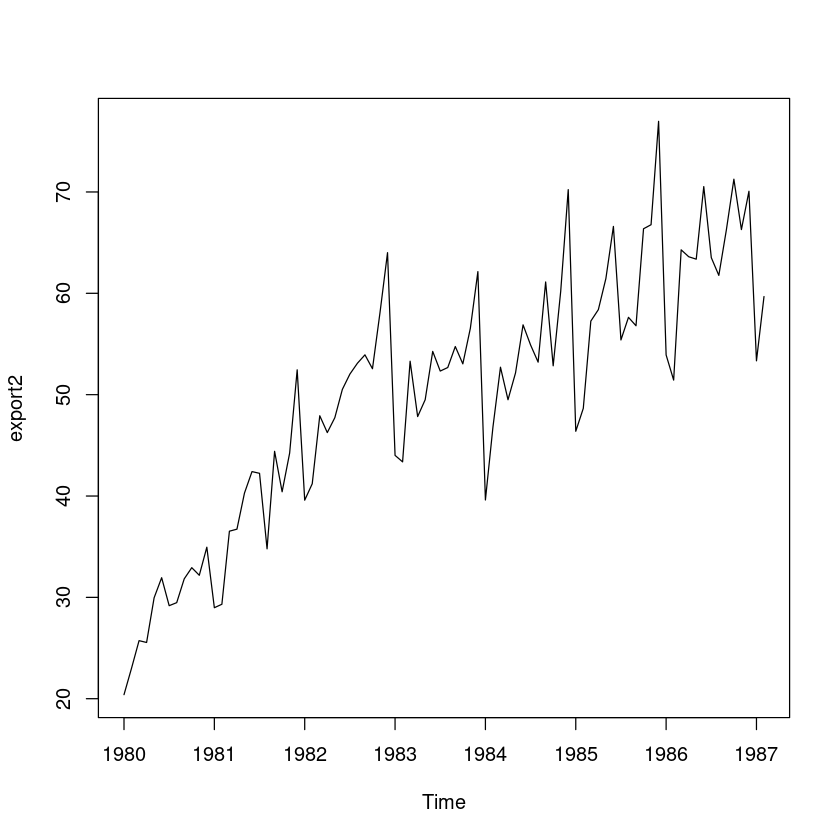

In [282]:
export2 <- ts(export, frequency=12, start=c(1980,1))
plot(export2)

### plot

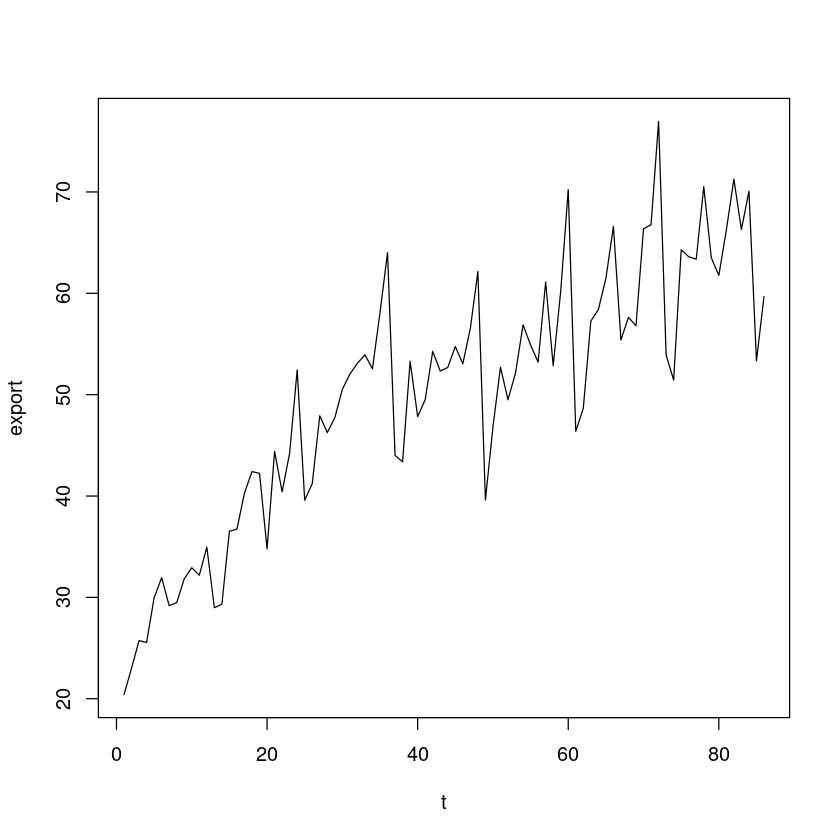

In [283]:
t <- 1:length(export)
plot(t, export, type='l')

## (2)

 이 시계열 자료는 어떤 성분으로 구성되어 있는지 설명하시오.


선형 계절 추세 모형

## (3)

 적절한 추세모형을 적합하여라. (지시함수 사용)

이분산성이 있어보이니 로그변환 실시

In [284]:
tmp.data <- data.frame(
 day = seq(ymd("1984-01-01"),
 by='1 month', length.out=length(export)),
 export=export
)
tmp.data$lnex <- log(export) #로그변환
tmp.data$y <- as.factor(as.integer(cycle(export2))) #지시함수로 사용할 주기
tmp.data$trend <- 1:length(export)

In [285]:
head(tmp.data)

,day,export,lnex,y,trend
,<date>,<dbl>,<dbl>,<fct>,<int>
1,1984-01-01,20.40,3.015535,1,1
2,1984-02-01,23.01,3.135929,2,2
3,1984-03-01,25.73,3.247658,3,3
4,1984-04-01,25.55,3.240637,4,4
5,1984-05-01,29.96,3.399863,5,5
6,1984-06-01,31.94,3.463859,6,6


### 제약조건 beta1=0

In [286]:
reg <- lm(lnex ~ trend + y, tmp.data)      
summary(reg)


Call:
lm(formula = lnex ~ trend + y, data = tmp.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.242037 -0.076076 -0.000101  0.061002  0.228615 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.2478546  0.0465045  69.840  < 2e-16 ***
trend       0.0097170  0.0005074  19.151  < 2e-16 ***
y2          0.0449215  0.0580829   0.773 0.441781    
y3          0.2113353  0.0601535   3.513 0.000764 ***
y4          0.1732163  0.0601385   2.880 0.005212 ** 
y5          0.2230338  0.0601278   3.709 0.000402 ***
y6          0.2902377  0.0601214   4.828 7.39e-06 ***
y7          0.2196982  0.0601192   3.654 0.000483 ***
y8          0.1847631  0.0601214   3.073 0.002977 ** 
y9          0.2563299  0.0601278   4.263 5.95e-05 ***
y10         0.2416985  0.0601385   4.019 0.000141 ***
y11         0.2741932  0.0601535   4.558 2.03e-05 ***
y12         0.3781424  0.0601727   6.284 2.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

`-` 제약조건 $\beta_1=0$

- s2는 1월보다 0.0449215만큼 더 팔리고

- s3는 1월보다 0.0449215만큼 더 팔린다.

s2는 유의하지 않게 나왔는데 이는 1월과 2월의 시간차이가 적기 때문이다.

### 제약조건 beta0=0

In [287]:
reg2 <- lm(lnex ~ 0+trend+y, tmp.data)  # 제약조건에서 beta0=0으로 놓는다는 뜻. 절편을 0으로!      
summary(reg2)


Call:
lm(formula = lnex ~ 0 + trend + y, data = tmp.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.242037 -0.076076 -0.000101  0.061002  0.228615 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
trend 0.0097170  0.0005074   19.15   <2e-16 ***
y1    3.2478546  0.0465045   69.84   <2e-16 ***
y2    3.2927761  0.0467447   70.44   <2e-16 ***
y3    3.4591898  0.0481580   71.83   <2e-16 ***
y4    3.4210709  0.0483687   70.73   <2e-16 ***
y5    3.4708884  0.0485837   71.44   <2e-16 ***
y6    3.5380923  0.0488031   72.50   <2e-16 ***
y7    3.4675528  0.0490268   70.73   <2e-16 ***
y8    3.4326177  0.0492547   69.69   <2e-16 ***
y9    3.5041845  0.0494867   70.81   <2e-16 ***
y10   3.4895531  0.0497228   70.18   <2e-16 ***
y11   3.5220478  0.0499630   70.49   <2e-16 ***
y12   3.6259970  0.0502071   72.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1162 on 73 degrees of freedom
Multiple R-squa

### 제약조건 sum

In [288]:
reg3 <- lm(lnex ~ trend+y, tmp.data,
           contrast = list(y="contr.sum"))
summary(reg3)


Call:
lm(formula = lnex ~ trend + y, data = tmp.data, contrasts = list(y = "contr.sum"))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.242037 -0.076076 -0.000101  0.061002  0.228615 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4559854  0.0253853 136.141  < 2e-16 ***
trend        0.0097170  0.0005074  19.151  < 2e-16 ***
y1          -0.2081308  0.0395338  -5.265 1.36e-06 ***
y2          -0.1632093  0.0395338  -4.128 9.59e-05 ***
y3           0.0032044  0.0420579   0.076   0.9395    
y4          -0.0349145  0.0420334  -0.831   0.4089    
y5           0.0149030  0.0420150   0.355   0.7238    
y6           0.0821069  0.0420028   1.955   0.0544 .  
y7           0.0115674  0.0419967   0.275   0.7838    
y8          -0.0233678  0.0419967  -0.556   0.5796    
y9           0.0481991  0.0420028   1.148   0.2549    
y10          0.0335677  0.0420150   0.799   0.4269    
y11          0.0660624  0.0420334   1.572   0.1204    
---
Signif.

## (4)

적합 결과를 설명하여라. (회귀계수의 의미 설명)


모형의 p-value값은 $<2.2e^{-16}$이므로 모형은 유의하고
$R^2$값도 85퍼의 설명력을 가진다.
각 회귀계수도 유의미하며,
..

In [289]:
head(data.frame(hat_y1 = fitted(reg),
                hat_y2 = fitted(reg2),
                hat_y3 = fitted(reg3)))

,hat_y1,hat_y2,hat_y3
,<dbl>,<dbl>,<dbl>
1,3.257572,3.257572,3.257572
2,3.312210,3.312210,3.312210
3,3.488341,3.488341,3.488341
4,3.459939,3.459939,3.459939
5,3.519473,3.519473,3.519473
6,3.596394,3.596394,3.596394


### 잔차분석

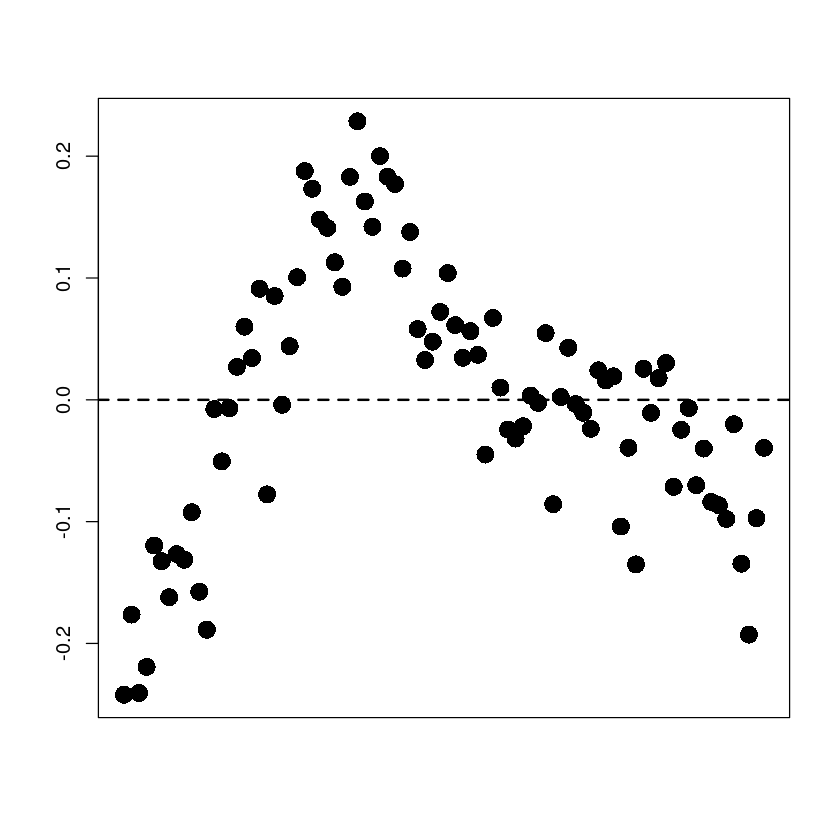

In [290]:
plot(tmp.data$trend,resid(reg),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", cex.main=2)
abline(h=0, lty=2, lwd=2)

### 독립성검정

In [291]:
dwtest(reg,alternative = "two.sided")


	Durbin-Watson test

data:  reg
DW = 0.36406, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


### 정규분포검정

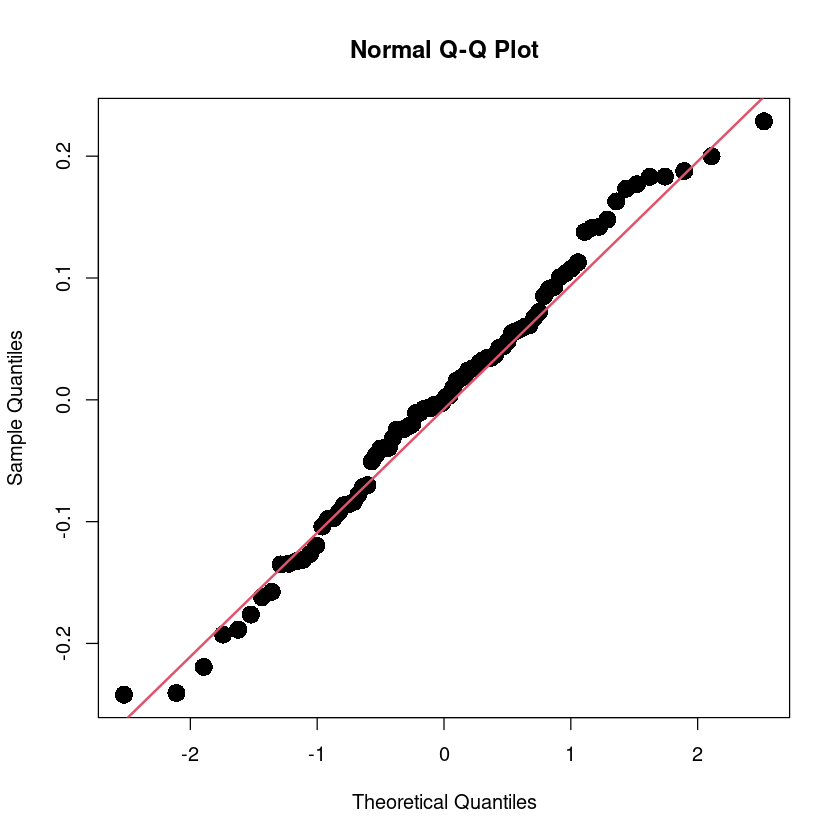

In [292]:
qqnorm(resid(reg), pch=16, cex=2)
qqline(resid(reg), col = 2, lwd=2)


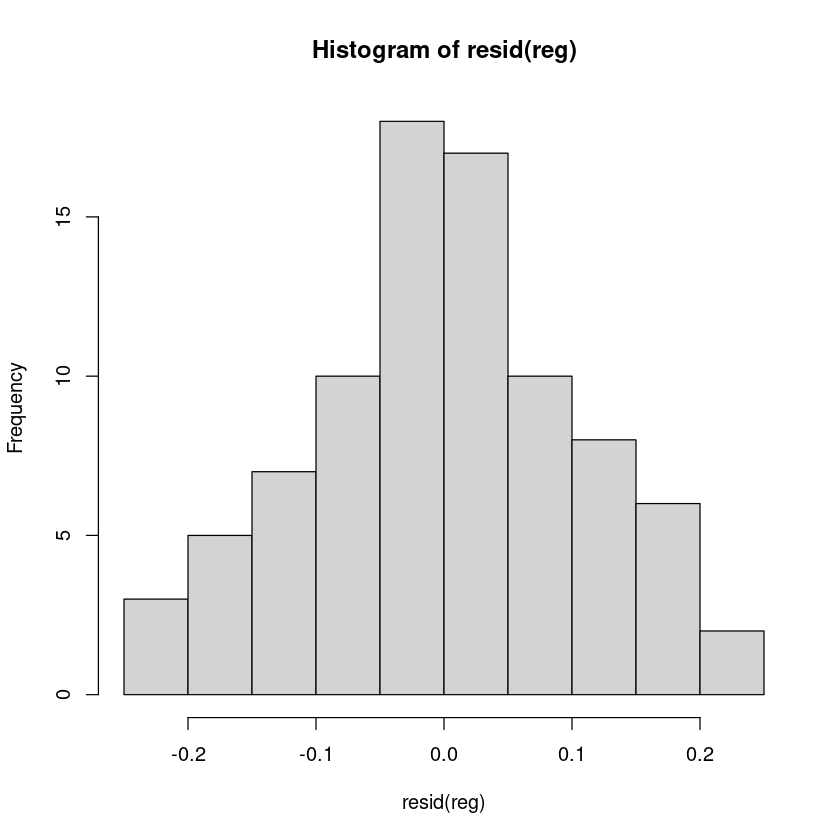

In [293]:
hist(resid(reg))

In [294]:
shapiro.test(resid(reg))


	Shapiro-Wilk normality test

data:  resid(reg)
W = 0.9873, p-value = 0.5678


### 등분산성검정

In [295]:
bptest(reg)


	studentized Breusch-Pagan test

data:  reg
BP = 25.457, df = 12, p-value = 0.0128


## (5)

 마지막 관측값으로 부터 $Z_{n+l}$ 에 대한 예측값 $\hat{Z}_n(l)$을 구하시오. $(n = 30, l = 1, 2, . . . , 12)$

> 문제 오류인듯? n=86이여야 하는 것 같다.

In [254]:
head(tmp.data)


,day,export,lnex,y,trend
,<date>,<dbl>,<dbl>,<fct>,<int>
1,1984-01-01,20.40,3.015535,1,1
2,1984-02-01,23.01,3.135929,2,2
3,1984-03-01,25.73,3.247658,3,3
4,1984-04-01,25.55,3.240637,4,4
5,1984-05-01,29.96,3.399863,5,5
6,1984-06-01,31.94,3.463859,6,6


In [270]:
new_data <- data.frame(
     trend = 87:98,
     y = as.factor(1:12)
     )
new_data

trend,y
<int>,<fct>
87,1
88,2
89,3
90,4
91,5
92,6
93,7
94,8
95,9


In [271]:
predict(reg, newdata = new_data)

1        2        3        4        5        6        7        8 
4.093234 4.147873 4.324004 4.295602 4.355136 4.432057 4.371235 4.346016 
       9       10       11       12 
4.427300 4.422386 4.464598 4.578264

In [272]:
exp(predict(reg, newdata = new_data))

1        2        3        4        5        6        7        8 
59.93342 63.29921 75.49026 73.37635 77.87743 84.10425 79.14128 77.17044 
       9       10       11       12 
83.70513 83.29479 86.88607 97.34524

## (6)

마지막 관측값으로 부터 $Z_{n+l}(n = 30, l = 1, 2, . . . , 12)$에 대한 95% 예측구간을 구하여라

In [273]:
predict_result <- as.data.frame(predict(reg, newdata = new_data, interval = "predict"))
predict_result

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,4.093234,3.843683,4.342785
2,4.147873,3.898322,4.397424
3,4.324004,4.071398,4.576609
4,4.295602,4.042996,4.548207
5,4.355136,4.102531,4.607742
6,4.432057,4.179452,4.684663
7,4.371235,4.118629,4.623840
8,4.346016,4.093411,4.598622
9,4.427300,4.174695,4.679906


In [274]:
predict_result$fitted_dep <- exp(predict_result$fit)
predict_result$fitted_dep_l <- exp(predict_result$lwr)
predict_result$fitted_dep_u <- exp(predict_result$upr)
predict_result


,fit,lwr,upr,fitted_dep,fitted_dep_l,fitted_dep_u
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.093234,3.843683,4.342785,59.93342,46.69716,76.92150
2,4.147873,3.898322,4.397424,63.29921,49.31961,81.24131
3,4.324004,4.071398,4.576609,75.49026,58.63889,97.18429
4,4.295602,4.042996,4.548207,73.37635,56.99686,94.46290
5,4.355136,4.102531,4.607742,77.87743,60.49319,100.25748
6,4.432057,4.179452,4.684663,84.10425,65.33002,108.27373
7,4.371235,4.118629,4.623840,79.14128,61.47491,101.88453
8,4.346016,4.093411,4.598622,77.17044,59.94401,99.34731
9,4.427300,4.174695,4.679906,83.70513,65.02000,107.75992


## (7)

예측값 및 예측구간의 하한값과 상한값을 관측값 $Z_t$의 시계열과 함께 표시하여라.

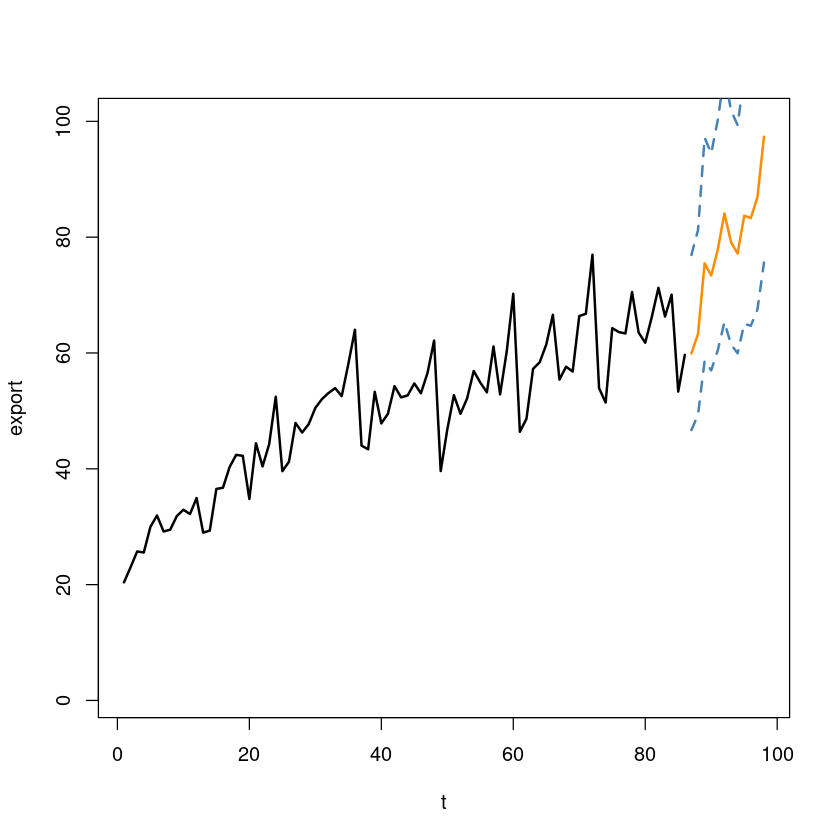

In [280]:
plot(export~tmp.data$trend, tmp.data,
     xlab = "t", ylab = "export",
     xlim=c(1,98),
     ylim=c(1,100),
     type='l',
     lwd=2)
lines(87:98, predict_result$fitted_dep, col='darkorange', lwd=2)
lines(87:98, predict_result$fitted_dep_l, col='steelblue', lwd=2, lty=2)
lines(87:98, predict_result$fitted_dep_u, col='steelblue', lwd=2, lty=2)